# CN5 shotgun metagenomics taxonomic analysis - Sandoval Velasquez et al., Campi Flegrei degassing

## Loading required packages and setting up plot preferences and ggplot theme for the Giovannelli Lab

In [18]:
save.image("CN5_kaiju_Sandoval.RData")

In [1]:
load("CN5_kaiju_Sandoval.RData")

In [2]:
library(phyloseq)
library(microbiome)
library(tidyverse)
library(vegan)
library(repr)
library(viridis)
library(ggrepel)
library(reshape2)
library(dplyr)
library(svglite)
library(devtools)

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute


Attaching package: ‘vegan’


The following object is masked 

In [3]:
theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}


In [4]:
options(repr.plot.width=16, repr.plot.height=12)
set.seed(10000)

In [5]:
ls()

[1] "ab"                                 "all_fams"                          
  [3] "barplot_top_family"                 "barplot_top_family_complete"       
  [5] "barplot_top_family_legend"          "barplot_top_phylum"                
  [7] "barplot_top_phylum_complete"        "barplot_top_phylum_legend"         
  [9] "barplot_vent_family"                "barplot_vent_top_family"           
 [11] "barplot_vent_top50_family"          "cn5_taxa_family"                   
 [13] "cn5_taxa_genus"                     "cn5_taxa_phylum"                   
 [15] "df_cn5_taxa_family"                 "df_cn5_taxa_genus"                 
 [17] "df_cn5_taxa_phylum"                 "df_fam"                            
 [19] "df_fam_filt"                        "df_family_cn5"                     
 [21] "df_family_cn5_otu_table"            "df_genus_cn5"                      
 [23] "df_genus_cn5_otu_table"             "df_phylum_cn5"                     
 [25] "df_phylum_cn5_otu_table"            "env_data_cn5_kaiju"                
 [27] "evals_uw"                           "evals_w"                           
 [29] "fam"                                "fam_by_sample"                     
 [31] "fam_cols"                           "fam_cols_top50"                    
 [33] "fam_cols_topvent"                   "fam_totals"                        
 [35] "fam_vec"                            "family"                            
 [37] "family_nmds_prok_ra_juw_ph"         "family_nmds_prok_ra_juw_temp"      
 [39] "family_nmds_prok_ra_jw_ph"          "family_nmds_prok_ra_jw_temp"       
 [41] "family_pcoa_prok_ra_juw_ph"         "family_pcoa_prok_ra_juw_temp"      
 [43] "family_pcoa_prok_ra_jw"             "family_pcoa_prok_ra_jw_ph"         
 [45] "family_pcoa_prok_ra_jw_temp"        "genus"                             
 [47] "genus_pcoa_prok_ra_juw"             "genus_pcoa_prok_ra_jw"             
 [49] "input_directory"                    "keep"                              
 [51] "keep_p"                             "leg"                               
 [53] "legend_family"                      "meta"                              
 [55] "ord"                                "otu_family"                        
 [57] "otu_mat"                            "otu_phylum"                        
 [59] "otu_vent_taxa"                      "output_directory"                  
 [61] "p"                                  "p_with_legend"                     
 [63] "p1"                                 "p2"                                
 [65] "ph_ticks"                           "phylum"                            
 [67] "phylum_nmds_prok_ra_juw_ph"         "phylum_nmds_prok_ra_juw_temp"      
 [69] "phylum_nmds_prok_ra_jw_ph"          "phylum_nmds_prok_ra_jw_temp"       
 [71] "phylum_pcoa_prok_ra_juw_ph"         "phylum_pcoa_prok_ra_juw_temp"      
 [73] "phylum_pcoa_prok_ra_jw_ph"          "phylum_pcoa_prok_ra_jw_temp"       
 [75] "prok_data_family_cn5_kaiju"         "prok_data_genus_cn5_kaiju"         
 [77] "prok_data_phyla_cn5_kaiju"          "prok_dist_unjac"                   
 [79] "prok_dist_wjac"                     "prok_n_family_cn5_kaiju"           
 [81] "prok_nmds_juw"                      "prok_nmds_jw"                      
 [83] "prok_pcoa_juw"                      "prok_pcoa_jw"                      
 [85] "prok_ra_family_cn5_kaiju"           "prok_ra_family_cn5_kaiju_1"        
 [87] "prok_ra_family_cn5_kaiju_1_sw"      "prok_ra_family_cn5_kaiju_ventonly" 
 [89] "prok_ra_family_cn5_kaiju_venttop"   "prok_ra_family_cn5_kaiju_venttop50"
 [91] "prok_ra_genus_cn5_kaiju"            "prok_ra_phyla_cn5_kaiju"           
 [93] "prok_ra_phyla_cn5_kaiju_1"          "prune_negatives"                   
 [95] "rename_map"                         "sd"                                
 [97] "sd_top"                             "sd1"                               
 [99] "sd2"                                "stretch_ph"                        
[1

## Generating the phyloseq objects

In [6]:
# loading the environmental dataset
env_data_cn5_kaiju<-read.csv("CN5_env_dataset.csv",header=T, sep=",", row.names=3)
env_data_cn5_kaiju

,ExpID,SiteID,samples,site_name,dist_vent,sw_layer,series,continent,country,year,⋯,DHS,DV,HF,PV,SR,slab_0me,SDepth,SDip,ConvR,ConvAge
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SF1D13_B1,CN523,SF1D13,SF1D13_B1,Secca delle Fumose geyser,0.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2A_B1,CN523,SF2A,SF2A_B1,Secca delle Fumose emissioni fredde,50.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2B_B1,CN523,SF2B,SF2B_B1,Secca delle Fumose emissioni fredde,20.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF2C_B1,CN523,SF2C,SF2C_B1,Secca delle Fumose emissioni fredde,20.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF1D13_B2,CN523,SF1D13,SF1D13_B2,Secca delle Fumose geyser,0.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SF1D13_F2,CN523,SF1D13,SF1D13_F2,Secca delle Fumose geyser,0.000000,,NA,EU,ITA,2023,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T1D1,CN523,T1D1,T1D1,Secca delle Fumose transect,408.590292,surface,NA,EU,ITA,2024,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T1D2,CN523,T1D2,T1D2,Secca delle Fumose transect,408.510742,bottom,NA,EU,ITA,2024,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
T2D1,CN523,T2D1,T2D1,Secca delle Fumose transect,195.909232,surface,NA,EU,ITA,2024,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
# define sampling renaming map
rename_map <- c(
  "CN523_SF1D13_230609_B" = "SF1D13_B1",
  "CN523_SF1D13_230728_B" = "SF1D13_B2",
  "CN523_SF1D13_230728_F" = "SF1D13_F2",
  "CN523_SF2A_230609_B"   = "SF2A_B1",
  "CN523_SF2B_230609_B"   = "SF2B_B1",
  "CN523_SF2C_230609_B"   = "SF2C_B1"
)

### Phylum

In [93]:
# upload the phylum Kaiju table
phylum <- read_tsv("phylum.tsv")

# extract unique phyla
df_phylum_cn5 <- as.data.frame(phylum)

unique_phylum <- character(0)

if ("phylum" %in% colnames(df_phylum_cn5)) {
  unique_phylum <- unique(df_phylum_cn5$phylum)
} else {
  cat("Skipping file (no 'phylum' column):", basename(file), "\n")
}

print(unique_phylum)

  [1] "Abditibacteriota"                          
  [2] "Acidobacteriota"                           
  [3] "Actinomycetota"                            
  [4] "Aquificota"                                
  [5] "Armatimonadota"                            
  [6] "Atribacterota"                             
  [7] "Bacillota"                                 
  [8] "Bacteroidota"                              
  [9] "Balneolota"                                
 [10] "Bdellovibrionota"                          
 [11] "Caldisericota"                             
 [12] "Calditrichota"                             
 [13] "Campylobacterota"                          
 [14] "Candidatus Abawacabacteria"                
 [15] "Candidatus Absconditabacteria"             
 [16] "Candidatus Abyssubacteria"                 
 [17] "Candidatus Adlerbacteria"                  
 [18] "Candidatus Aenigmarchaeota"                
 [19] "Candidatus Aerophobetes"                   
 [20] "Candidatus Altiarchaeota

In [95]:
# rename samples
colnames(df_phylum_cn5) <- dplyr::recode(colnames(df_phylum_cn5), !!!rename_map)

In [96]:
# build the phyloseq tax_table at the phylum level
unique_phylum <- unique(df_phylum_cn5$phylum)

df_cn5_taxa_phylum <- data.frame(phylum = unique_phylum,
                                 row.names = unique_phylum,
                                 stringsAsFactors = FALSE)

cn5_taxa_phylum <- tax_table(as.matrix(df_cn5_taxa_phylum))

cn5_taxa_phylum

,phylum
Abditibacteriota,Abditibacteriota
Acidobacteriota,Acidobacteriota
Actinomycetota,Actinomycetota
Aquificota,Aquificota
Armatimonadota,Armatimonadota
Atribacterota,Atribacterota
Bacillota,Bacillota
Bacteroidota,Bacteroidota
Balneolota,Balneolota
Bdellovibrionota,Bdellovibrionota


In [15]:
# prepare the otu table
df_phylum_cn5_otu_table<-df_phylum_cn5

row.names(df_phylum_cn5_otu_table)<-df_phylum_cn5_otu_table[,1] 

df_phylum_cn5_otu_table<-df_phylum_cn5_otu_table[,-1]

df_phylum_cn5_otu_table[is.na(df_phylum_cn5_otu_table)] <- 0

df_phylum_cn5_otu_table <- otu_table(df_phylum_cn5_otu_table, taxa_are_rows=T)

df_phylum_cn5_otu_table

,T1D1,T1D2,T2D1,T2D2,T3D1,T3D2,T4D1,T4D2,T4D3,T5D1,⋯,T8D2,T9D1,T9D2,T9D3,SF1D13_B1,SF1D13_B2,SF1D13_F2,SF2A_B1,SF2B_B1,SF2C_B1
Abditibacteriota,0.000071,0.000192,0.000189,0.000355,0.000120,0.000180,0.000322,0.000125,0.000229,0.000237,⋯,0.000178,0.000154,0.000176,0.000322,0.000634,0.000873,0.000103,0.001655,0.001576,0.001702
Acidobacteriota,0.011924,0.037017,0.030043,0.072454,0.028153,0.040109,0.045950,0.020276,0.036549,0.035160,⋯,0.032470,0.042243,0.032871,0.047437,0.302366,0.557076,0.082144,2.925653,2.282372,1.700319
Actinomycetota,0.344927,0.717779,0.768524,1.358268,0.755532,1.464693,1.039879,0.652093,1.881973,1.068799,⋯,1.653326,1.328778,1.903302,2.362125,0.551286,0.667054,0.178718,2.016709,1.308926,1.753052
Aquificota,0.000637,0.001469,0.001415,0.002371,0.001756,0.003822,0.001979,0.002218,0.003750,0.003481,⋯,0.003546,0.003798,0.004194,0.004373,7.221953,32.823353,72.121536,0.081067,0.078102,0.057982
Armatimonadota,0.001171,0.003977,0.003520,0.008718,0.002904,0.003850,0.005291,0.001872,0.003444,0.003917,⋯,0.003446,0.004490,0.003309,0.004598,0.049366,0.105929,0.115094,0.090309,0.094917,0.123626
Atribacterota,0.000099,0.000295,0.000212,0.000405,0.000192,0.000418,0.000327,0.000172,0.000378,0.000392,⋯,0.000349,0.000341,0.000353,0.000515,0.003493,0.006144,0.003310,0.012482,0.035417,0.022599
Bacillota,0.099398,0.400349,0.296815,0.456821,0.258090,0.204231,0.361715,0.131636,0.191135,0.449482,⋯,0.271013,0.680500,0.365598,0.220941,0.527338,0.789245,0.705023,0.846449,1.073309,1.167421
Bacteroidota,3.853605,16.564648,17.017572,24.699018,22.059525,13.242819,24.683634,10.169329,13.196474,35.510666,⋯,25.394348,32.068336,26.446545,16.827595,3.912942,4.309022,0.861444,6.160776,8.917941,10.068401
Balneolota,0.012346,0.028233,0.042202,0.048187,0.052834,0.072204,0.058820,0.071309,0.103060,0.081160,⋯,0.100077,0.071604,0.102497,0.119269,0.027744,0.035348,0.005598,0.046970,0.052245,0.057597
Bdellovibrionota,0.005355,0.013446,0.009780,0.019052,0.010833,0.039872,0.013007,0.019714,0.031339,0.015526,⋯,0.029214,0.018959,0.024055,0.047135,0.067843,0.036956,0.009378,0.079068,0.077313,0.084952


In [70]:
# build the phyloseq object
prok_data_phyla_cn5_kaiju <- phyloseq(
  sample_data(env_data_cn5_kaiju),
  otu_table(as.matrix(df_phylum_cn5_otu_table), taxa_are_rows = TRUE),
  tax_table(cn5_taxa_phylum)
)

prok_data_phyla_cn5_kaiju

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 190 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 190 taxa by 1 taxonomic ranks ]

In [71]:
colnames(tax_table(prok_data_phyla_cn5_kaiju))

head(tax_table(prok_data_phyla_cn5_kaiju))

print(otu_table(prok_data_phyla_cn5_kaiju))

[1] "phylum"

,phylum
Abditibacteriota,Abditibacteriota
Acidobacteriota,Acidobacteriota
Actinomycetota,Actinomycetota
Aquificota,Aquificota
Armatimonadota,Armatimonadota
Atribacterota,Atribacterota


OTU Table:          [190 taxa and 27 samples]
                     taxa are rows
                                                T1D1      T1D2      T2D1
Abditibacteriota                            0.000071  0.000192  0.000189
Acidobacteriota                             0.011924  0.037017  0.030043
Actinomycetota                              0.344927  0.717779  0.768524
Aquificota                                  0.000637  0.001469  0.001415
Armatimonadota                              0.001171  0.003977  0.003520
Atribacterota                               0.000099  0.000295  0.000212
Bacillota                                   0.099398  0.400349  0.296815
Bacteroidota                                3.853605 16.564648 17.017572
Balneolota                                  0.012346  0.028233  0.042202
Bdellovibrionota                            0.005355  0.013446  0.009780
Caldisericota                               0.000064  0.000102  0.000098
Calditrichota                              

In [73]:
# median library-size scaling
prok_n_phyla_cn5_kaiju <- transform_sample_counts(prok_data_phyla_cn5_kaiju, function(x) ((x / sum(x, na.rm=T))*median(colSums(otu_table(prok_data_phyla_cn5_kaiju), na.rm=T))))

In [74]:
# relative abundance transformation
prok_ra_phyla_cn5_kaiju <- transform_sample_counts(prok_n_phyla_cn5_kaiju, function(x) {x / sum(x, na.rm = TRUE)})


### Family


In [5]:
# upload the family Kaiju table
family <- read_tsv("family.tsv")

# extract unique families
df_family_cn5 <- as.data.frame(family)

unique_family <- character(0)

if ("family" %in% colnames(df_family_cn5)) {
  unique_family <- unique(df_family_cn5$family)
} else {
  cat("Skipping file (no 'family' column):", basename(file), "\n")
}

print(unique_family)

  [1] "Abditibacteriaceae"                               
  [2] "Acanthopleuribacteraceae"                         
  [3] "Acaryochloridaceae"                               
  [4] "Acetobacteraceae"                                 
  [5] "Acetomicrobiaceae"                                
  [6] "Acholeplasmataceae"                               
  [7] "Acidaminococcaceae"                               
  [8] "Acidiferrobacteraceae"                            
  [9] "Acidilobaceae"                                    
 [10] "Acidilutibacteraceae"                             
 [11] "Acidimicrobiaceae"                                
 [12] "Acidithiobacillaceae"                             
 [13] "Acidobacteriaceae"                                
 [14] "Acidothermaceae"                                  
 [15] "Actinomycetaceae"                                 
 [16] "Actinopolymorphaceae"                             
 [17] "Actinopolysporaceae"                              
 [18] "Actinos

In [76]:
# rename samples
colnames(df_family_cn5) <- dplyr::recode(colnames(df_family_cn5), !!!rename_map)

In [77]:
# build the phyloseq tax_table at the family level
unique_family <- unique(df_family_cn5$family)

df_cn5_taxa_family <- data.frame(family = unique_family,
                                 row.names = unique_family,
                                 stringsAsFactors = FALSE)

cn5_taxa_family <- tax_table(as.matrix(df_cn5_taxa_family))

cn5_taxa_family

,family
Abditibacteriaceae,Abditibacteriaceae
Acanthopleuribacteraceae,Acanthopleuribacteraceae
Acaryochloridaceae,Acaryochloridaceae
Acetobacteraceae,Acetobacteraceae
Acetomicrobiaceae,Acetomicrobiaceae
Acholeplasmataceae,Acholeplasmataceae
Acidaminococcaceae,Acidaminococcaceae
Acidiferrobacteraceae,Acidiferrobacteraceae
Acidilobaceae,Acidilobaceae
Acidilutibacteraceae,Acidilutibacteraceae


In [78]:
# prepare the otu table
df_family_cn5_otu_table <- df_family_cn5

row.names(df_family_cn5_otu_table) <- df_family_cn5_otu_table[,1]  

df_family_cn5_otu_table <- df_family_cn5_otu_table[,-1]            

df_family_cn5_otu_table[is.na(df_family_cn5_otu_table)] <- 0       

df_family_cn5_otu_table <- otu_table(df_family_cn5_otu_table, taxa_are_rows = TRUE)

df_family_cn5_otu_table

,T1D1,T1D2,T2D1,T2D2,T3D1,T3D2,T4D1,T4D2,T4D3,T5D1,⋯,T8D2,T9D1,T9D2,T9D3,SF1D13_B1,SF1D13_B2,SF1D13_F2,SF2A_B1,SF2B_B1,SF2C_B1
Abditibacteriaceae,0.000030,0.000091,0.000116,0.000184,0.000065,0.000076,0.000157,0.000064,0.000122,0.000137,⋯,0.000105,0.000084,0.000100,0.000166,0.000202,0.000268,0.000037,0.000731,0.000525,0.000595
Acanthopleuribacteraceae,0.000328,0.000841,0.000702,0.001428,0.000798,0.001362,0.001086,0.000690,0.001174,0.000782,⋯,0.000996,0.001154,0.001031,0.001616,0.005241,0.006544,0.001096,0.014741,0.010815,0.010429
Acaryochloridaceae,0.000136,0.000462,0.000299,0.000638,0.000428,0.000599,0.000419,0.000297,0.000539,0.000675,⋯,0.000480,0.000702,0.000479,0.000567,0.006618,0.004089,0.000270,0.009628,0.007526,0.006332
Acetobacteraceae,0.010050,0.016360,0.016426,0.028129,0.017835,0.030631,0.025788,0.023386,0.033787,0.059464,⋯,0.029202,0.077733,0.030432,0.042785,0.141861,0.087630,0.028207,0.165285,0.095602,0.084318
Acetomicrobiaceae,0.000033,0.000079,0.000071,0.000151,0.000056,0.000084,0.000118,0.000040,0.000095,0.000106,⋯,0.000071,0.000097,0.000089,0.000084,0.003911,0.013317,0.023101,0.002566,0.003853,0.003265
Acholeplasmataceae,0.000232,0.000482,0.000652,0.000997,0.000486,0.000876,0.000808,0.000685,0.001203,0.000957,⋯,0.000920,0.000886,0.001011,0.001200,0.001015,0.001049,0.000213,0.002184,0.003077,0.003935
Acidaminococcaceae,0.001123,0.005637,0.002955,0.005750,0.001030,0.001120,0.003967,0.001028,0.001609,0.004569,⋯,0.001255,0.002469,0.001734,0.001389,0.005235,0.003239,0.000627,0.002901,0.003480,0.004074
Acidiferrobacteraceae,0.000191,0.000438,0.000372,0.000744,0.000498,0.000603,0.000569,0.000397,0.000603,0.000432,⋯,0.000492,0.000607,0.000447,0.000683,0.010103,0.026018,0.006073,0.089488,0.040737,0.025029
Acidilobaceae,0.000002,0.000003,0.000003,0.000008,0.000004,0.000009,0.000002,0.000003,0.000000,0.000000,⋯,0.000002,0.000015,0.000002,0.000007,0.000500,0.000880,0.000364,0.000135,0.000110,0.000104
Acidilutibacteraceae,0.000002,0.000021,0.000017,0.000017,0.000016,0.000014,0.000018,0.000015,0.000017,0.000069,⋯,0.000013,0.000037,0.000020,0.000016,0.000130,0.000321,0.000072,0.000065,0.000065,0.000087


In [79]:
# build the phyloseq object
prok_data_family_cn5_kaiju <- phyloseq(
  sample_data(env_data_cn5_kaiju),
  otu_table(as.matrix(df_family_cn5_otu_table), taxa_are_rows = TRUE),
  tax_table(cn5_taxa_family)
)

prok_data_family_cn5_kaiju

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 762 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 762 taxa by 1 taxonomic ranks ]

In [81]:
# median library-size scaling
prok_n_family_cn5_kaiju <- transform_sample_counts(prok_data_family_cn5_kaiju, function(x) ((x / sum(x, na.rm=T))*median(colSums(otu_table(prok_data_family_cn5_kaiju), na.rm=T))))

In [82]:
# relative abundance transformation
prok_ra_family_cn5_kaiju <- transform_sample_counts(prok_n_family_cn5_kaiju, function(x) {x / sum(x, na.rm = TRUE)})

### Genus

In [98]:
# upload the genus Kaiju table
ganus <- read_tsv("genus.tsv")

# extract unique genera
df_genus_cn5 <- as.data.frame(genus)

unique_genus <- character(0)

if ("genus" %in% colnames(df_genus_cn5)) {
  unique_genus <- unique(df_genus_cn5$genus)
} else {
  cat("Skipping file (no 'genus' column):", basename(file), "\n")
}

print(unique_genus)

   [1] "Abditibacterium"                          
   [2] "Abiotrophia"                              
   [3] "Absicoccus"                               
   [4] "Absiella"                                 
   [5] "Abyssalbus"                               
   [6] "Abyssibacter"                             
   [7] "Abyssibius"                               
   [8] "Abyssicoccus"                             
   [9] "Abyssisolibacter"                         
  [10] "Acanthopleuribacter"                      
  [11] "Acaricomes"                               
  [12] "Acaryochloris"                            
  [13] "Acerihabitans"                            
  [14] "Acetanaerobacterium"                      
  [15] "Acetatifactor"                            
  [16] "Acetitomaculum"                           
  [17] "Acetivibrio"                              
  [18] "Acetoanaerobium"                          
  [19] "Acetobacter"                              
  [20] "Acetobacterium"        

In [99]:
# rename samples
colnames(df_genus_cn5) <- dplyr::recode(colnames(df_genus_cn5), !!!rename_map)

In [100]:
# build the phyloseq tax_table at the genus level
unique_genus <- unique(df_genus_cn5$genus)

df_cn5_taxa_genus <- data.frame(genus = unique_genus,
                                row.names = unique_genus,
                                stringsAsFactors = FALSE)

cn5_taxa_genus <- tax_table(as.matrix(df_cn5_taxa_genus))

cn5_taxa_genus

,genus
Abditibacterium,Abditibacterium
Abiotrophia,Abiotrophia
Absicoccus,Absicoccus
Absiella,Absiella
Abyssalbus,Abyssalbus
Abyssibacter,Abyssibacter
Abyssibius,Abyssibius
Abyssicoccus,Abyssicoccus
Abyssisolibacter,Abyssisolibacter
Acanthopleuribacter,Acanthopleuribacter


In [101]:
#prepare the otu table
df_genus_cn5_otu_table <- df_genus_cn5

row.names(df_genus_cn5_otu_table) <- df_genus_cn5_otu_table[,1]   

df_genus_cn5_otu_table <- df_genus_cn5_otu_table[,-1]            

df_genus_cn5_otu_table[is.na(df_genus_cn5_otu_table)] <- 0        

df_genus_cn5_otu_table <- otu_table(df_genus_cn5_otu_table, taxa_are_rows = TRUE)

df_genus_cn5_otu_table

,T1D1,T1D2,T2D1,T2D2,T3D1,T3D2,T4D1,T4D2,T4D3,T5D1,⋯,T8D2,T9D1,T9D2,T9D3,SF1D13_B1,SF1D13_B2,SF1D13_F2,SF2A_B1,SF2B_B1,SF2C_B1
Abditibacterium,0.000030,0.000091,0.000116,0.000184,0.000065,0.000076,0.000157,0.000064,0.000122,0.000137,⋯,0.000105,0.000084,0.000100,0.000166,0.000202,0.000268,0.000037,0.000731,0.000525,0.000595
Abiotrophia,0.000000,0.000004,0.000002,0.000008,0.000006,0.000002,0.000016,0.000000,0.000001,0.000000,⋯,0.000002,0.000011,0.000003,0.000008,0.000021,0.000010,0.000000,0.000020,0.000021,0.000049
Absicoccus,0.000019,0.000036,0.000046,0.000057,0.000118,0.000107,0.000087,0.000022,0.000040,0.000040,⋯,0.000039,0.000162,0.000083,0.000050,0.000058,0.000046,0.000007,0.000147,0.000175,0.000175
Absiella,0.000000,0.000005,0.000000,0.000000,0.000003,0.000001,0.000003,0.000000,0.000001,0.000002,⋯,0.000000,0.000006,0.000001,0.000001,0.000008,0.000000,0.000000,0.000000,0.000010,0.000010
Abyssalbus,0.000468,0.001618,0.001894,0.002980,0.002743,0.001860,0.002794,0.001315,0.001594,0.003926,⋯,0.003297,0.003794,0.003508,0.002288,0.000828,0.000751,0.000156,0.002723,0.001592,0.001951
Abyssibacter,0.000151,0.000320,0.000242,0.000543,0.000428,0.000579,0.000430,0.000298,0.000457,0.000401,⋯,0.000395,0.000482,0.000375,0.000591,0.001906,0.003070,0.000706,0.011096,0.005030,0.003673
Abyssibius,0.000253,0.000521,0.000428,0.000791,0.000622,0.000864,0.000717,0.000619,0.000792,0.000669,⋯,0.001096,0.001046,0.000961,0.001128,0.003086,0.003368,0.000469,0.005255,0.002274,0.002139
Abyssicoccus,0.000005,0.000023,0.000025,0.000037,0.000012,0.000030,0.000036,0.000019,0.000021,0.000031,⋯,0.000032,0.000060,0.000029,0.000048,0.000039,0.000086,0.000007,0.000082,0.000084,0.000068
Abyssisolibacter,0.000010,0.000030,0.000012,0.000049,0.000036,0.000076,0.000033,0.000043,0.000071,0.000029,⋯,0.000063,0.000054,0.000056,0.000086,0.000146,0.000142,0.000064,0.000594,0.000912,0.000890
Acanthopleuribacter,0.000161,0.000385,0.000341,0.000680,0.000451,0.000655,0.000535,0.000338,0.000614,0.000370,⋯,0.000490,0.000519,0.000495,0.000820,0.002112,0.002948,0.000515,0.005881,0.004374,0.004016


In [102]:
# build the phyloseq object
prok_data_genus_cn5_kaiju <- phyloseq(
  sample_data(env_data_cn5_kaiju),
  otu_table(as.matrix(df_genus_cn5_otu_table), taxa_are_rows = TRUE),
  tax_table(cn5_taxa_genus)
)

prok_data_genus_cn5_kaiju

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4110 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 216 sample variables ]
tax_table()   Taxonomy Table:    [ 4110 taxa by 1 taxonomic ranks ]

In [104]:
# median library-size scaling
prok_n_genus_cn5_kaiju <- transform_sample_counts(prok_data_genus_cn5_kaiju, function(x) ((x / sum(x, na.rm=T))*median(colSums(otu_table(prok_data_genus_cn5_kaiju), na.rm=T))))

In [105]:
# relative abundance transformation
prok_ra_genus_cn5_kaiju <- transform_sample_counts(prok_n_genus_cn5_kaiju, function(x) {x / sum(x, na.rm = TRUE)})

### Barplots

In [23]:
# extract sample metadata
sd <- data.frame(sample_data(prok_ra_phyla_cn5_kaiju))

In [24]:
unique(sd$feature_type)

sort(table(sd$feature_type, useNA = "ifany"), decreasing = TRUE)

[1] "seawater" "biofilm"  "vent"


seawater  biofilm     vent 
      21        5        1 

#### Top phyla (> 1 %)

In [25]:
# assign a desired order to feature_type
sd <- data.frame(sample_data(prok_ra_phyla_cn5_kaiju))

sd$feature_type <- factor(sd$feature_type, levels = c("biofilm", "vent", "seawater"))

sample_data(prok_ra_phyla_cn5_kaiju) <- sample_data(sd)

In [26]:
# filter low-abundance phyla (that never reach at least 1% relative abundance in any sample)
keep_p <- taxa_names(prok_ra_phyla_cn5_kaiju)[apply(otu_table(prok_ra_phyla_cn5_kaiju), 1, max) >= 0.01]

prok_ra_phyla_cn5_kaiju_1 <- prune_taxa(keep_p, prok_ra_phyla_cn5_kaiju)

In [27]:
# extract the filtered otu table
otu_phylum <- as.data.frame(otu_table(prok_ra_phyla_cn5_kaiju_1))

head(otu_phylum)

,T1D1,T1D2,T2D1,T2D2,T3D1,T3D2,T4D1,T4D2,T4D3,T5D1,⋯,T8D2,T9D1,T9D2,T9D3,SF1D13_B1,SF1D13_B2,SF1D13_F2,SF2A_B1,SF2B_B1,SF2C_B1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Acidobacteriota,1.039118e-04,2.970988e-04,2.542135e-04,5.745432e-04,2.072200e-04,0.0002805373,3.717714e-04,1.619552e-04,0.0002850881,2.243263e-04,⋯,2.298754e-04,2.452242e-04,2.214845e-04,0.0003442757,0.0022095196,0.003884491,0.0006148842,0.0187856647,0.0147897336,0.0109195395
Actinomycetota,3.005868e-03,5.760901e-03,6.502985e-03,1.077075e-02,5.561088e-03,0.0102446100,8.413433e-03,5.208615e-03,0.0146796911,6.819104e-03,⋯,1.170492e-02,7.713669e-03,1.282443e-02,0.0171432070,0.0040284861,0.004651368,0.0013377834,0.0129493207,0.0084818193,0.0112581937
Aquificota,5.551140e-06,1.179021e-05,1.197324e-05,1.880147e-05,1.292503e-05,0.0000267325,1.601165e-05,1.771635e-05,0.0000292506,2.220932e-05,⋯,2.510434e-05,2.204771e-05,2.825913e-05,0.0000317372,0.0527739451,0.228877263,0.5398616578,0.0005205325,0.0005060997,0.0003723635
Bacteroidota,3.358226e-02,1.329480e-01,1.439968e-01,1.958574e-01,1.623690e-01,0.0926252228,1.997099e-01,8.122786e-02,0.1029346130,2.265636e-01,⋯,1.797824e-01,1.861594e-01,1.781966e-01,0.1221268749,0.0285935655,0.030046813,0.0064482901,0.0395584411,0.0577881134,0.0646598096
Campylobacterota,1.439462e-04,1.968780e-04,1.874933e-04,2.403591e-04,1.743186e-04,0.0004140599,2.092114e-04,2.746114e-04,0.0003846571,3.624949e-04,⋯,3.120061e-04,2.673474e-04,3.474714e-04,0.0003598069,0.0082679085,0.012445516,0.0257452835,0.0291101447,0.0880150153,0.1544831835
Candidatus Thermoplasmatota,6.255273e-05,1.428951e-04,7.683182e-05,1.320147e-04,6.982164e-05,0.0004309164,1.386274e-04,6.197368e-04,0.0010280845,1.399041e-04,⋯,6.125177e-03,1.335181e-03,3.382255e-03,0.0118499014,0.0001918055,0.000334453,0.0002445644,0.0006545198,0.0018752879,0.0014556226


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the phyloseq package.
  Please report the issue at <https://github.com/joey711/phyloseq/issues>.”


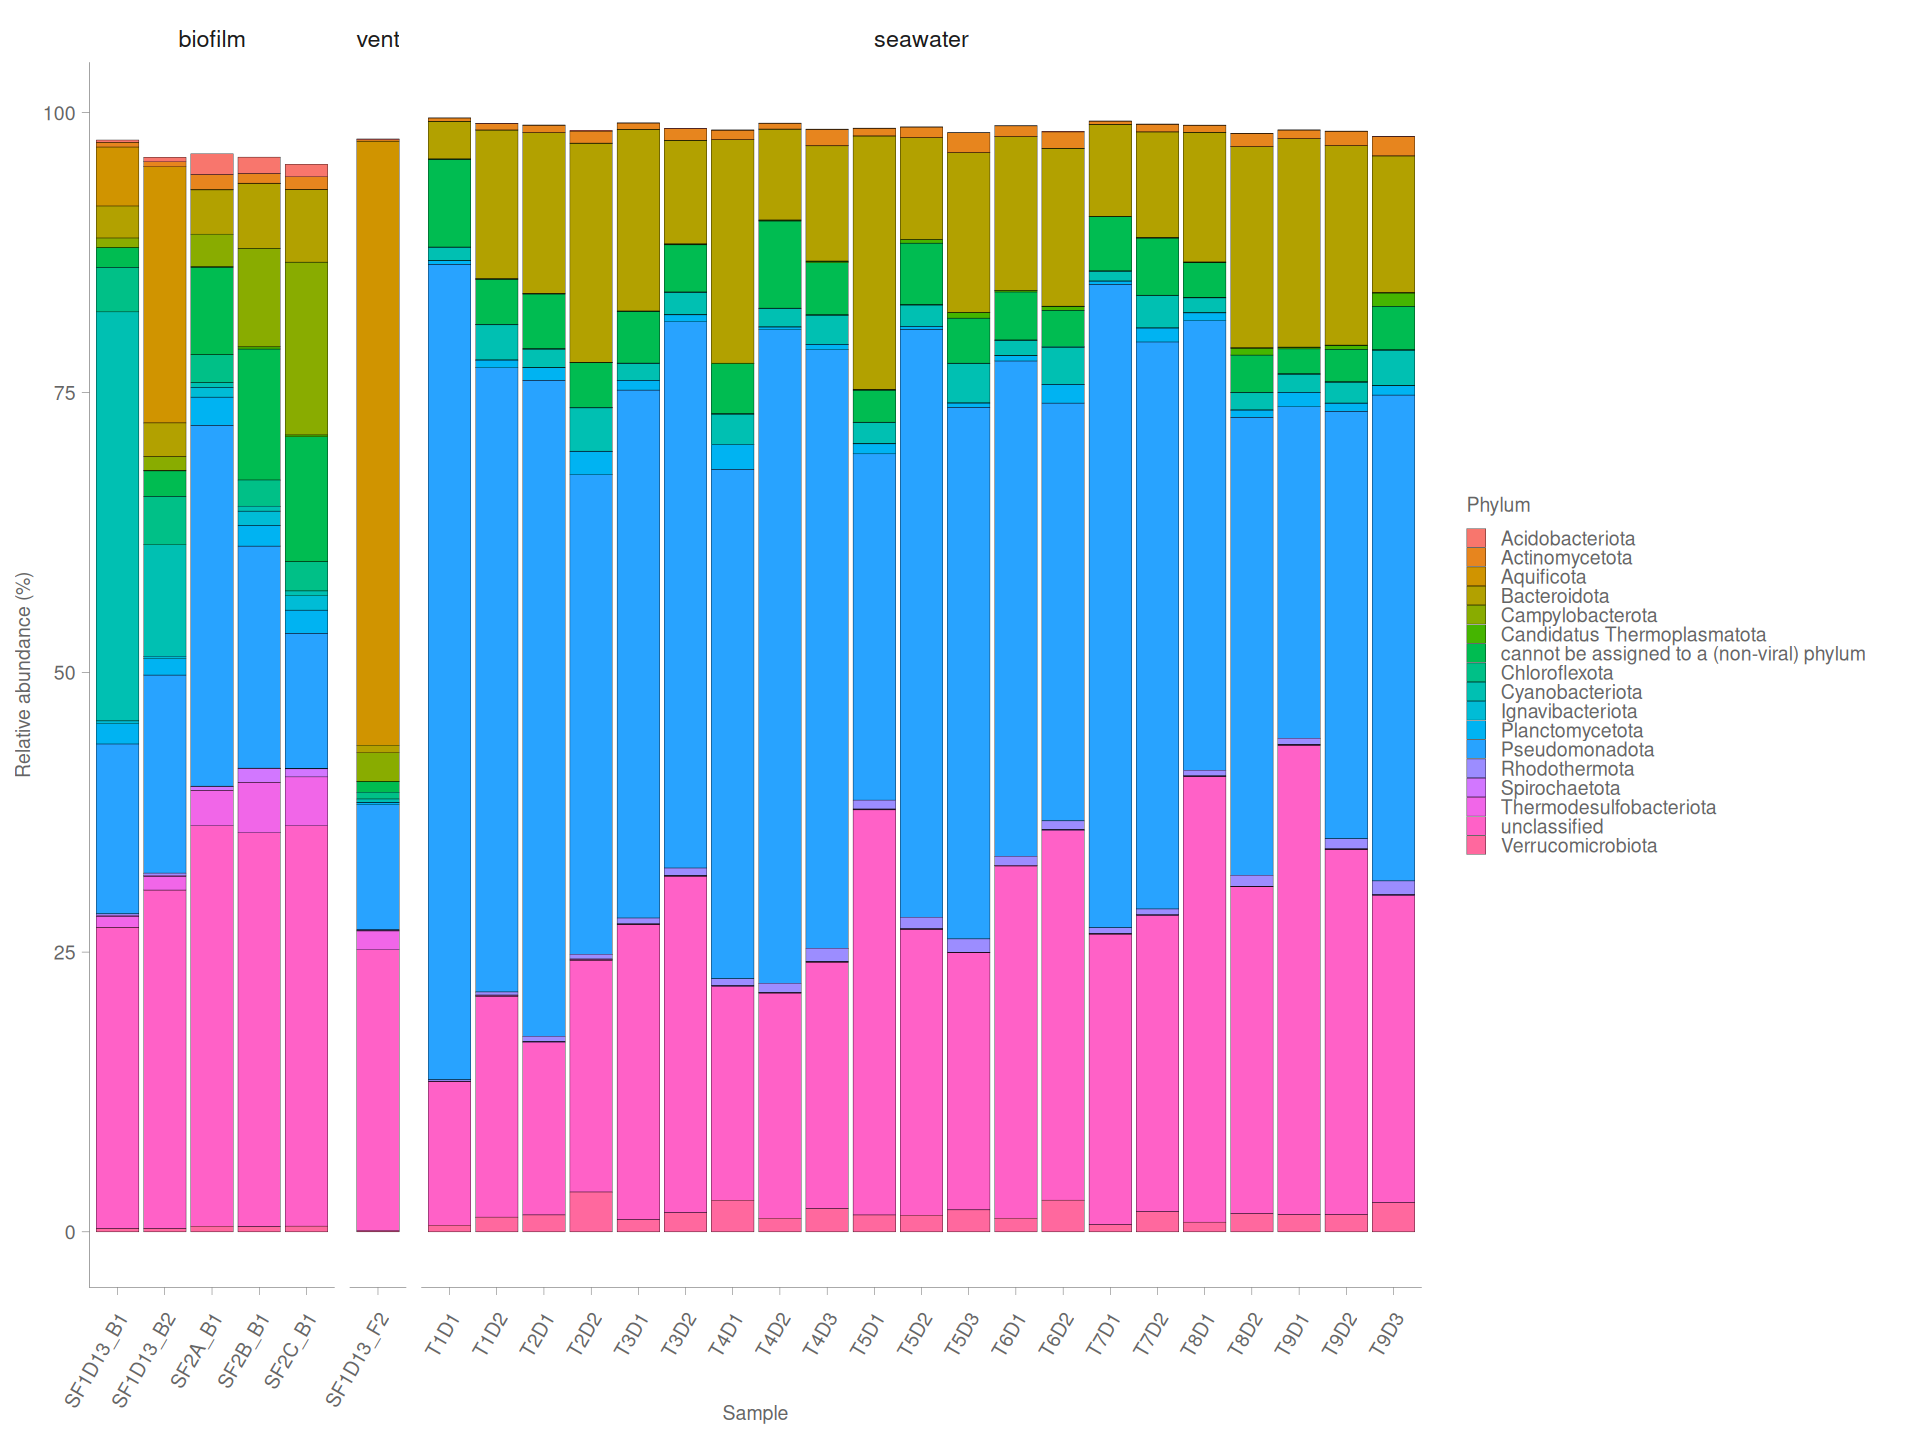

In [16]:
# phylum-level relative abundance barplot
barplot_top_phylum <- plot_bar(prok_ra_phyla_cn5_kaiju_1, fill="phylum", x="samples") +
  guides(fill = guide_legend(ncol = 1)) +
  scale_y_continuous(breaks = c(0, .25, .5, .75, 1),
                     labels = c("0", "25", "50", "75", "100")) +
  facet_grid(. ~ feature_type, scales = "free_x", space = "free_x") +
  labs(x = "Sample", y = "Relative abundance (%)", fill = "Phylum") +
  theme_glab(base_size = 18) +
  theme(panel.border = element_blank(),
        axis.line = element_line(),
        strip.background = element_blank(),
        strip.text = element_text(size = 14),
        legend.position = "right",
        axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1))

barplot_top_phylum

#ggsave("./plots/barplot_phylum.png", width = 16, height = 12, dpi = 300)
#ggsave("./plots/barplot_phylum.svg", width = 16, height = 12, dpi = 300)

#### Top families (> 1 %)

In [21]:
# assign a desired order to feature_type
sd <- data.frame(sample_data(prok_ra_family_cn5_kaiju))

sd$feature_type <- factor(sd$feature_type, levels = c("biofilm", "vent", "seawater"))

sample_data(prok_ra_family_cn5_kaiju) <- sample_data(sd)

In [42]:
# filter low-abundance phyla (that never reach at least 1% relative abundance in any sample)
keep <- taxa_names(prok_ra_family_cn5_kaiju)[apply(otu_table(prok_ra_family_cn5_kaiju), 1, max) >= 0.01]

prok_ra_family_cn5_kaiju_1 <- prune_taxa(keep, prok_ra_family_cn5_kaiju)

In [ ]:
# extract the filtered otu table
otu_family <- as.data.frame(otu_table(prok_ra_family_cn5_kaiju_1))

head(otu_family)

Warning message in plot_theme(plot):
“The `ncol` theme element is not defined in the element hierarchy.”


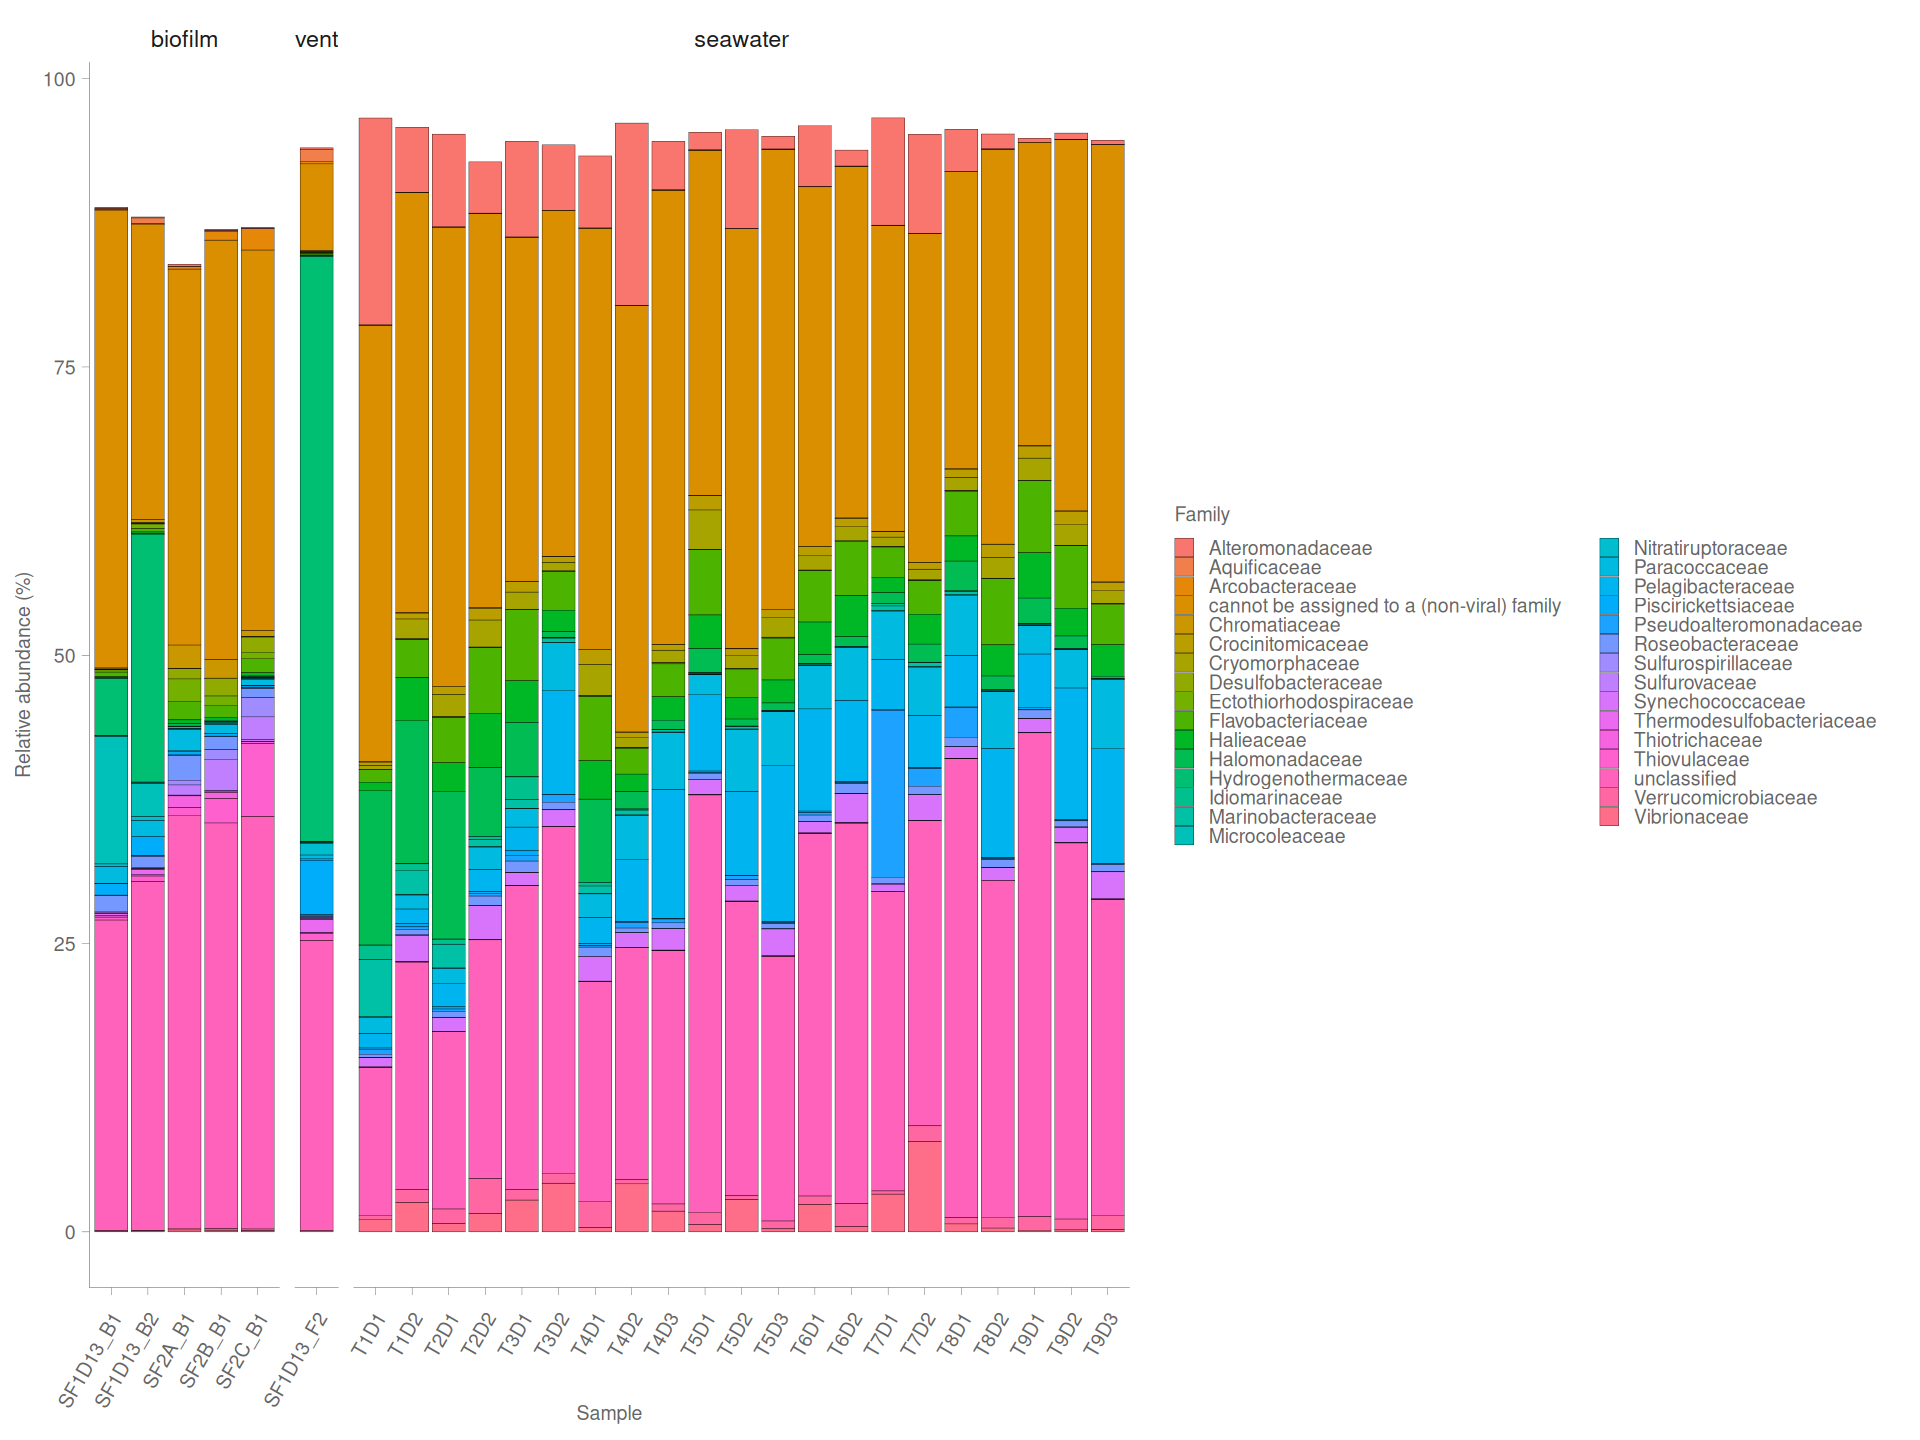

In [46]:
# family-level relative abundance barplot
barplot_top_family <- plot_bar(prok_ra_family_cn5_kaiju_1, fill="family", x="samples") +
  scale_y_continuous(breaks = c(0, .25, .5, .75, 1),
                     labels = c("0","25","50","75","100")) +
  facet_grid(. ~ feature_type, scales = "free_x", space = "free_x") + 
  labs(x="Sample", y="Relative abundance (%)", fill="Family") +
  theme_glab(base_size = 18) +
  theme(panel.border = element_blank(), axis.line = element_line(),
        strip.background = element_blank(), strip.text = element_text(size=14),
        legend.position = "right", ncol = 1,
        axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1))

barplot_top_family

In [ ]:
#ggsave("./paper andres/plots/barplot_top_family_complete.svg",
#       barplot_top_family_complete, width = 16, height = 15, dpi = 300)
#ggsave("./paper andres/plots/barplot_top_family_complete.png",
#       barplot_top_family_complete, width = 16, height = 15, dpi = 300)

#### Vent-associated families

In [6]:
# loading the vent-associated families list
vent_csv <- "vent-associated_families.csv"

vent_df <- read.csv(vent_csv, stringsAsFactors = FALSE, check.names = FALSE)

In [13]:
# extract family list
if ("family" %in% names(vent_df)) {
  vent_fams <- vent_df$family
} else if (ncol(vent_df) == 1) {
  vent_fams <- vent_df[[1]]
} else {
  stop("vent-associated_families.csv must have a 'family' column or be a single-column file.")
}

In [14]:
# define the sample order 
ord <- sample_names(prok_ra_family_cn5_kaiju)

sd1 <- data.frame(sample_data(prok_ra_family_cn5_kaiju))

sd1$SampleID <- factor(sample_names(prok_ra_family_cn5_kaiju), levels = ord)

sd1$feature_type <- factor(sd1$feature_type, levels = c("biofilm", "vent", "seawater"))

sample_data(prok_ra_family_cn5_kaiju) <- sample_data(sd1)

In [15]:
# select taxa whose family annotation matches the vent-associated family list
taxa_keep <- taxa_names(prok_ra_family_cn5_kaiju)[
  as.character(tax_table(prok_ra_family_cn5_kaiju)[, "family"]) %in% vent_fams
]

In [16]:
# create a vent-only phyloseq object by pruning to the selected taxa
prok_ra_family_cn5_kaiju_ventonly <- prune_taxa(taxa_keep, prok_ra_family_cn5_kaiju)

In [17]:
# enforce same samples + same order, and ensure metadata + SampleID exist
prok_ra_family_cn5_kaiju_ventonly <- prune_samples(ord, prok_ra_family_cn5_kaiju_ventonly)

In [18]:
# reattach sample metadata to the filtered object 
sample_data(prok_ra_family_cn5_kaiju_ventonly) <- sample_data(prok_ra_family_cn5_kaiju)

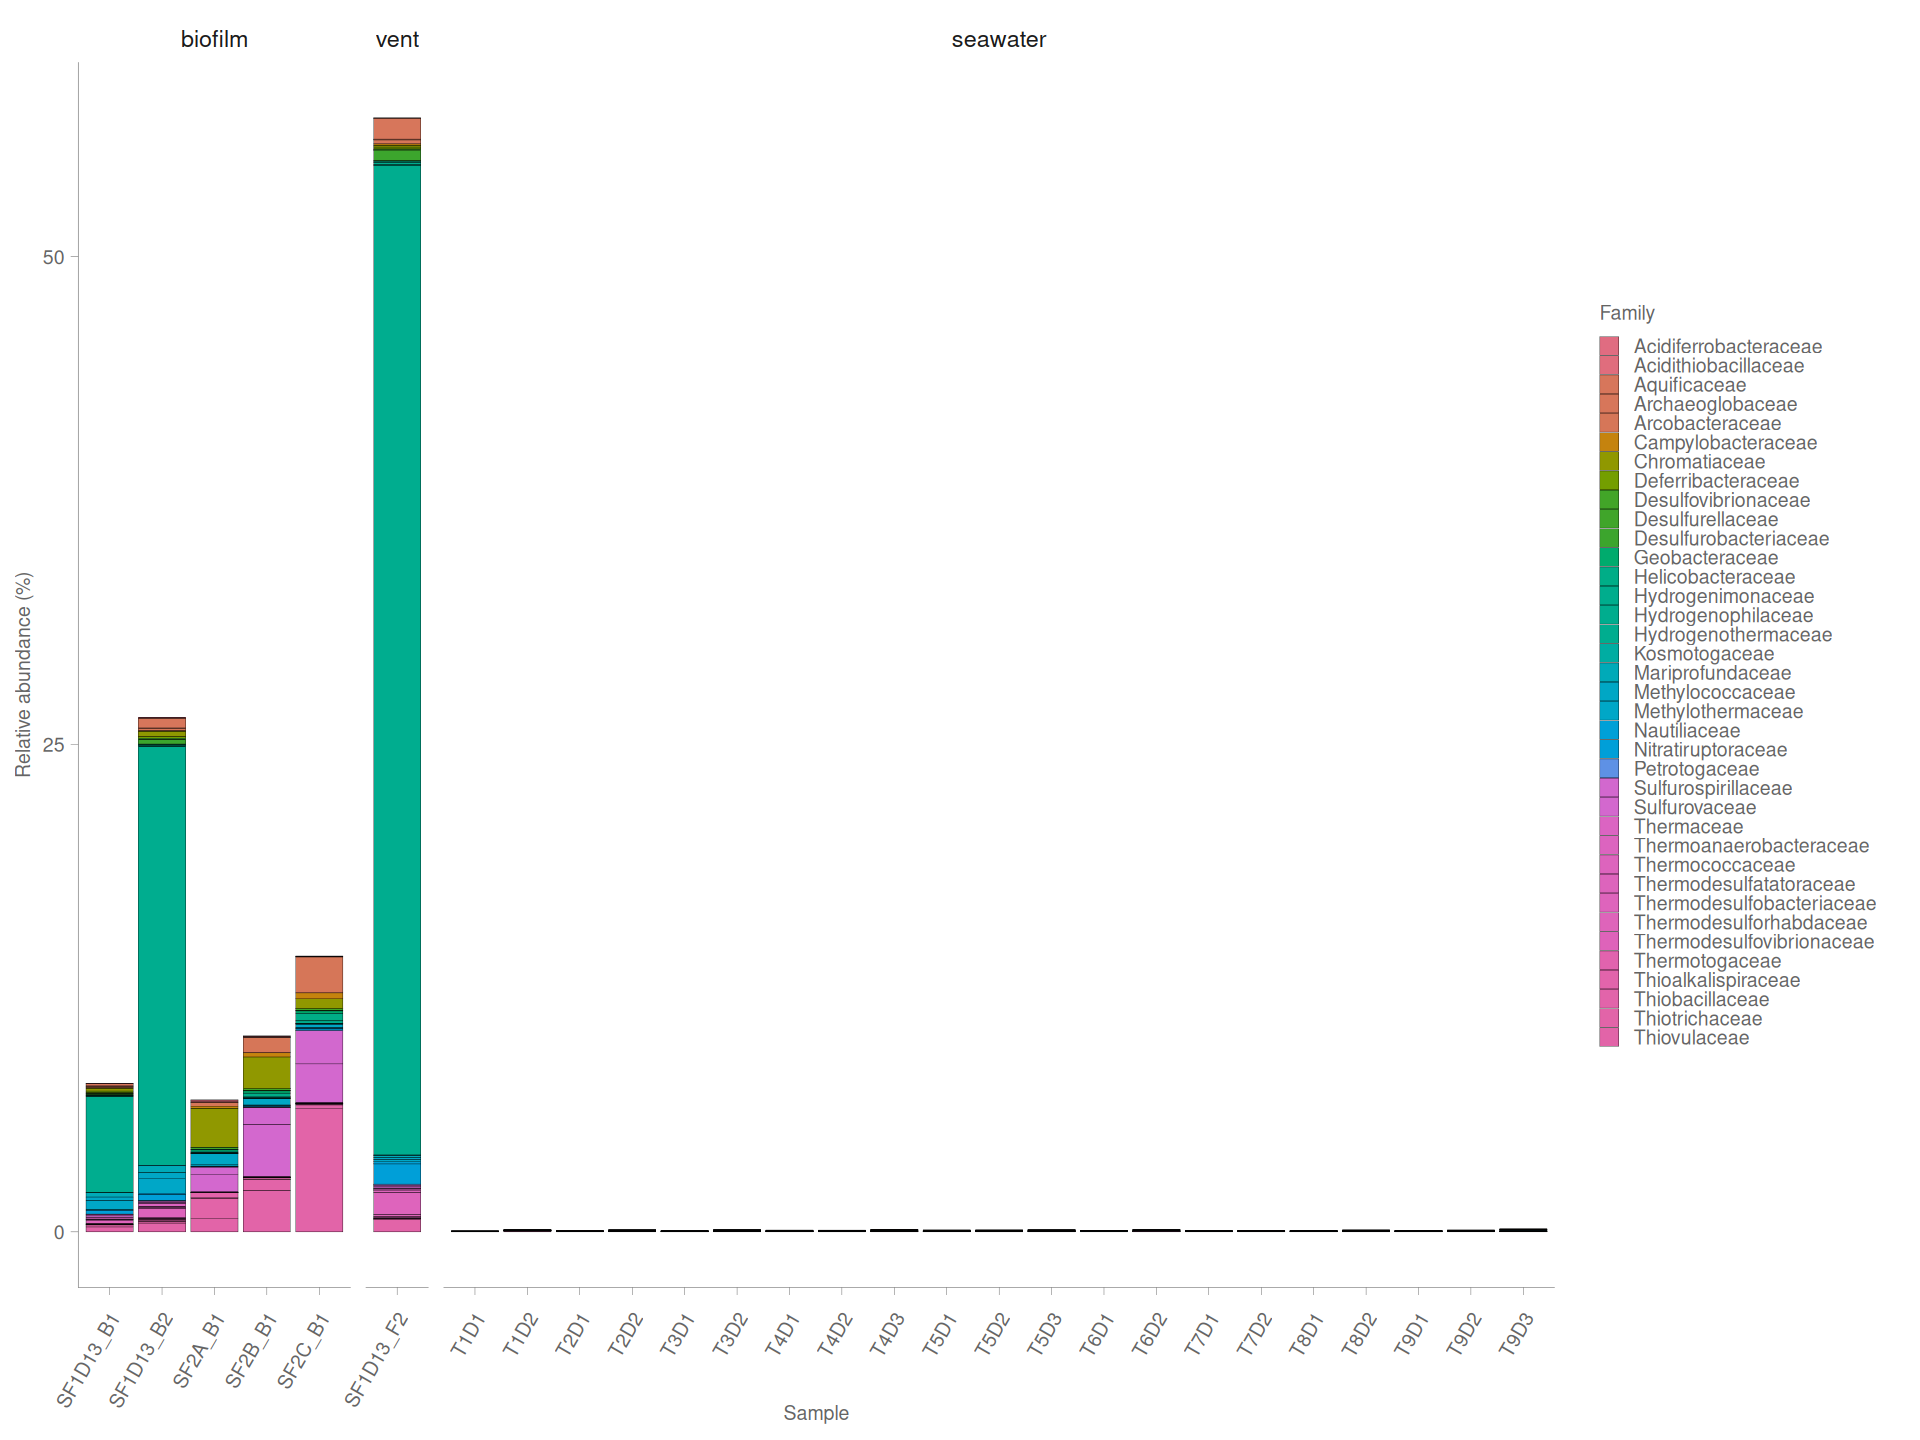

In [19]:
# vent-associated families relative abundance barplot
barplot_vent_family <- plot_bar(prok_ra_family_cn5_kaiju_ventonly, fill = "family", x = "SampleID") +
  scale_fill_manual(values = fam_cols, drop = FALSE) +
  guides(fill = guide_legend(ncol = 1)) +
  scale_y_continuous(breaks = c(0, .25, .5, .75, 1),
                     labels = c("0", "25", "50", "75", "100")) +
  facet_grid(. ~ feature_type, scales = "free_x", space = "free_x") +
  labs(x = "Sample", y = "Relative abundance (%)", fill = "Family") +
  theme_glab(base_size = 18) +
  theme(panel.border = element_blank(),
        axis.line = element_line(),
        strip.background = element_blank(),
        strip.text = element_text(size = 14),
        legend.position = "right",
        axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1))

barplot_vent_family

#ggsave("./plots/barplot_vent_families.png", width = 16, height = 8, dpi = 300)
#ggsave("./plots/barplot_vent_families.svg", width = 16, height = 8, dpi = 300)

#### Vent-associated families in seawater samples

In [13]:
# keep seawater-only sample order 
prok_ra_family_cn5_kaiju_sw <- subset_samples(prok_ra_family_cn5_kaiju, feature_type == "seawater")

ord <- sample_names(prok_ra_family_cn5_kaiju_sw)

# keep only seawater samples in the object and copy metadata
sample_data(prok_ra_family_cn5_kaiju_venttop) <- sample_data(prok_ra_family_cn5_kaiju)

prok_ra_family_cn5_kaiju_venttop <- prune_samples(ord, prok_ra_family_cn5_kaiju_venttop)

In [14]:
# order samples by dist_vent and by feature_type
sd <- data.frame(sample_data(prok_ra_family_cn5_kaiju_venttop))

sd$dist_vent <- as.numeric(as.character(sd$dist_vent))

sd$sw_layer  <- factor(sd$sw_layer, levels = c("surface", "middle", "bottom"))

sample_data(prok_ra_family_cn5_kaiju_venttop) <- sample_data(sd)

ord <- rownames(sd)[order(sd$dist_vent, na.last = TRUE)]

# apply order to the phyloseq object
prok_ra_family_cn5_kaiju_venttop <- prune_samples(ord, prok_ra_family_cn5_kaiju_venttop)

sd2 <- data.frame(sample_data(prok_ra_family_cn5_kaiju_venttop))

sd2$samples <- factor(sample_names(prok_ra_family_cn5_kaiju_venttop), levels = ord)

sample_data(prok_ra_family_cn5_kaiju_venttop) <- sample_data(sd2)

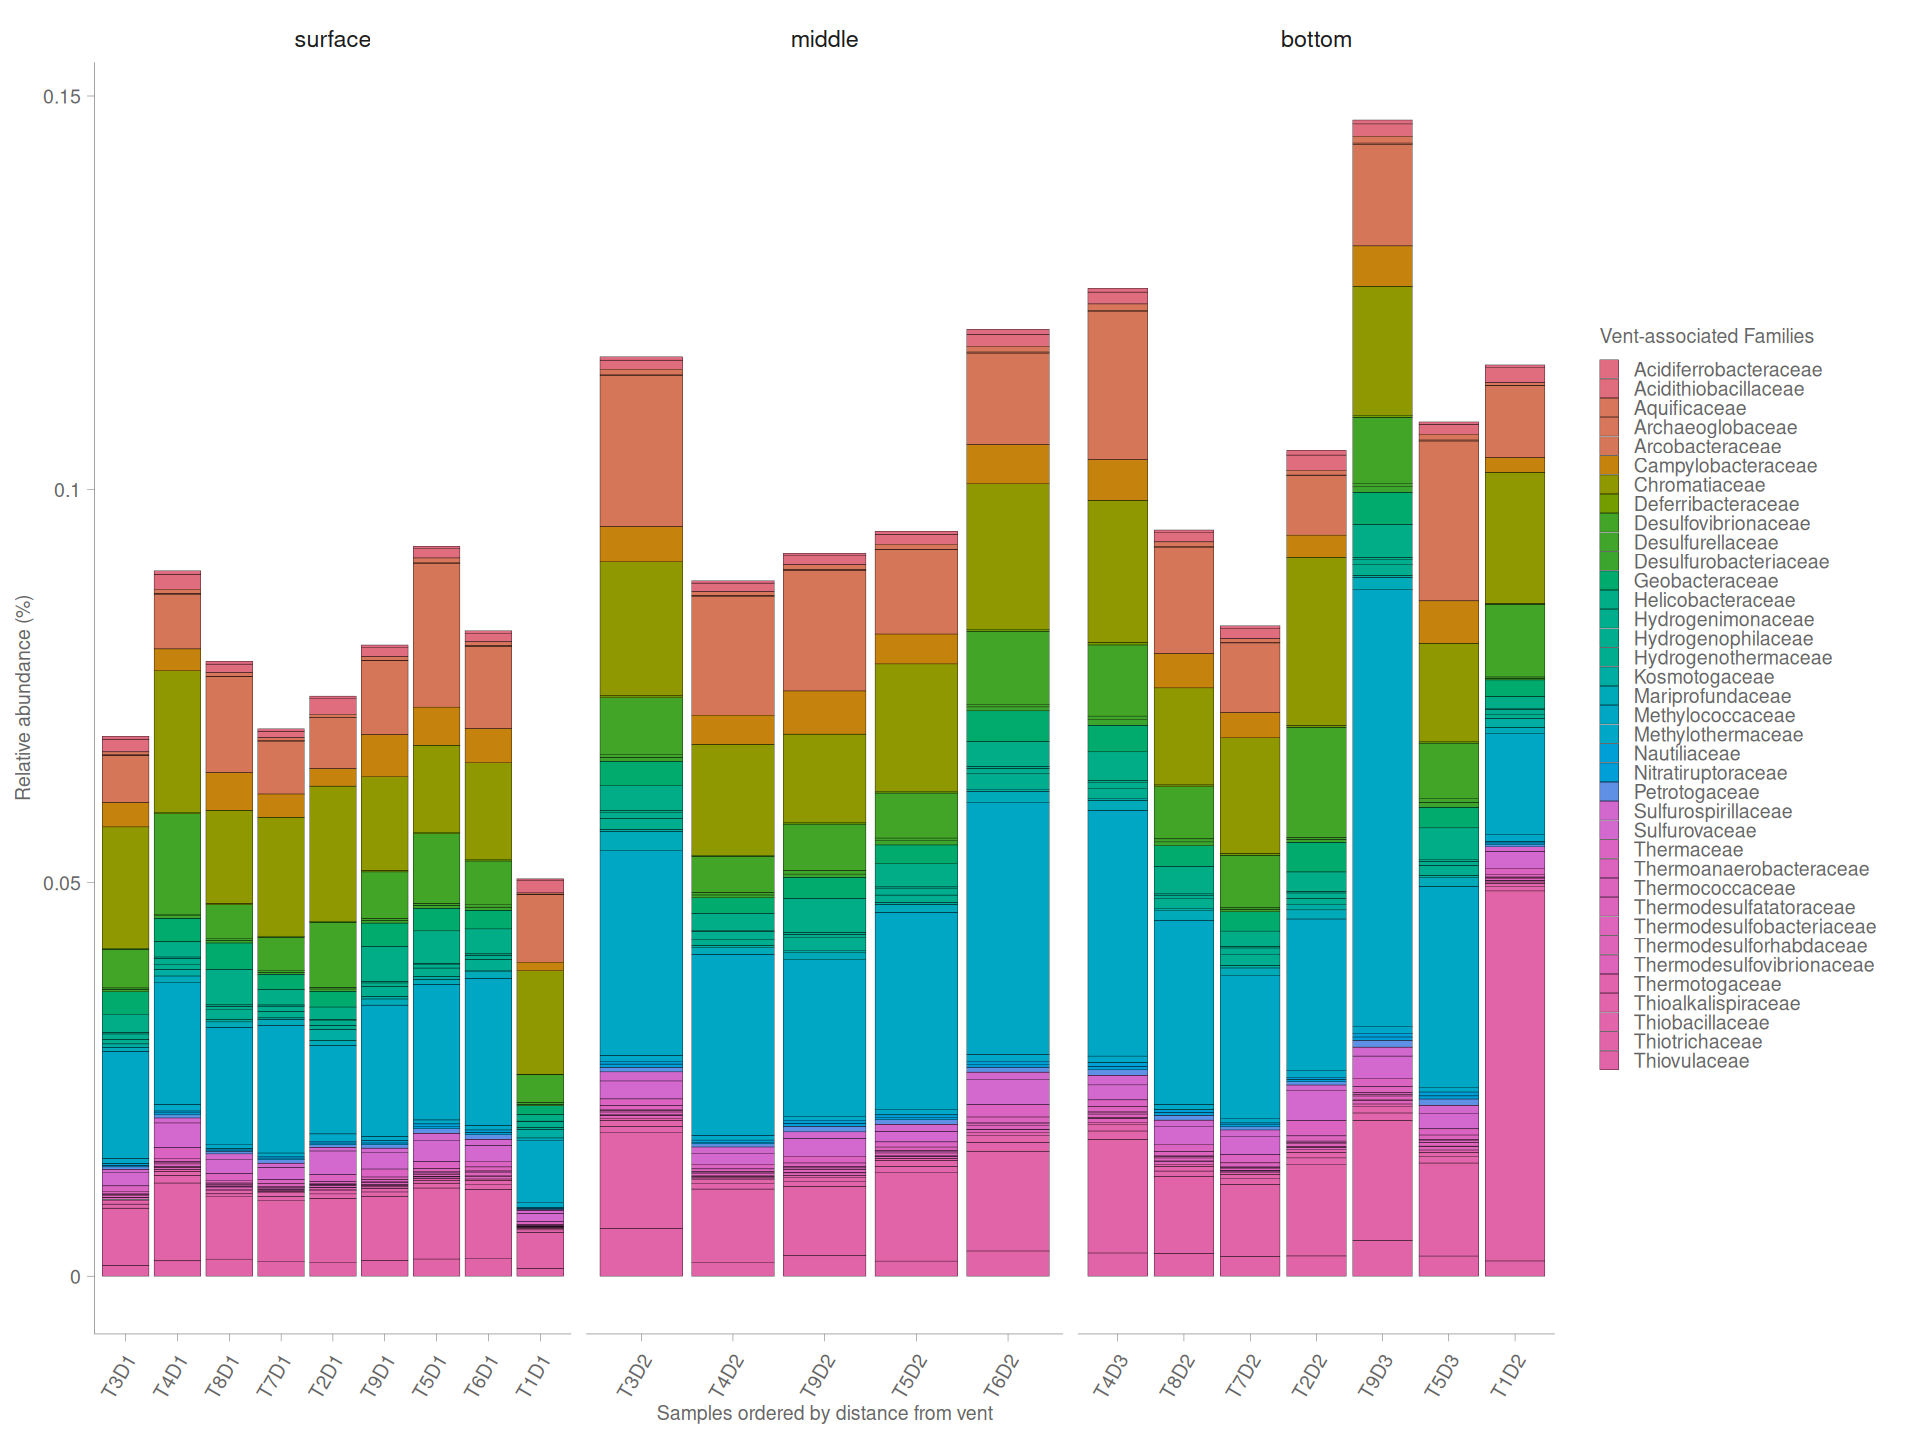

In [15]:
# 4) Plot: x ordered by dist_vent, facet by sw_layer
barplot_vent_top_family <- plot_bar(prok_ra_family_cn5_kaiju_venttop, fill = "family", x = "samples") +
  scale_fill_manual(values = fam_cols_topvent, drop = FALSE) +
  guides(fill = guide_legend(ncol = 1)) +
  scale_y_continuous(
    breaks = c(0, 0.0005, 0.0010, 0.0015),      # 0%, 0.5%, 1%, 2%, 3%
    labels = c("0", "0.05", "0.1", "0.15")
  ) +
  facet_wrap(~ sw_layer, scales = "free_x", nrow = 1) +
  labs(x = "Samples ordered by distance from vent", y = "Relative abundance (%)", fill = "Vent-associated Families") +
  theme_glab(base_size = 18) +
  theme(panel.border = element_blank(),
        axis.line = element_line(),
        strip.background = element_blank(),
        strip.text = element_text(size = 14),
        legend.position = "right",
        axis.text.x = element_text(angle = 60, vjust = 0.9, hjust = 1))

barplot_vent_top_family

#ggsave("./plots/barplot_sw_vent_families.png", width = 16, height = 8, dpi = 300)
#ggsave("./plots/barplot_sw_vent_families.svg", width = 16, height = 8, dpi = 300)

## Beta diversity Genus

In [114]:
# compute genus-level beta-diversity using Jaccard distance
prok_dist_wjac <- phyloseq::distance(prok_ra_genus_cn5_kaiju, method = "jaccard")

### PCoA

In [115]:
# perform Principal Coordinates Analysis (PCoA) using weighted Jaccard distance
prok_pcoa_jw <- ordinate(prok_ra_genus_cn5_kaiju,prok_dist_wjac, method = "PCoA",trymax=1000)

In [7]:
# apply custom pH transformation
stretch_ph <- function(x,
                       lo1 = c(5.90, 6.40), to1 = c(0.00, 0.25),
                       lo2 = c(8.20, 8.35), to2 = c(0.35, 1.00),
                       split = 7) {
  y <- rep(NA_real_, length(x))
  i1 <- x <= split
  i2 <- x >  split
  y[i1] <- scales::rescale(x[i1], from = lo1, to = to1)
  y[i2] <- scales::rescale(x[i2], from = lo2, to = to2)
  y
}

# add to sample_data
sample_data(prok_ra_genus_cn5_kaiju)$ph_stretch <- stretch_ph(sample_data(prok_ra_genus_cn5_kaiju)$ph)

ph_ticks <- c(6, 7, 8, 8.5)
stretch_ticks <- stretch_ph(ph_ticks)

In [ ]:
# inspect PCoA eigenvalues and compute % variance explained by the first two axes 
prok_pcoa_jw$values$Relative_eig

var_expl <- round(100 * prok_pcoa_jw$values$Relative_eig[1:2], 2)

[1]  0.3645648193  0.2021716128  0.1300703012  0.0826573274  0.0602147653
 [6]  0.0437359542  0.0303390221  0.0226453523  0.0164790764  0.0124828685
[11]  0.0105304855  0.0105145210  0.0075125193  0.0061483410  0.0046026130
[16]  0.0029131221  0.0020362353  0.0015529422  0.0009756143  0.0006907571
[21]  0.0000000000 -0.0001875774 -0.0006691689 -0.0010566284 -0.0028611658
[26] -0.0033317361 -0.0047319737

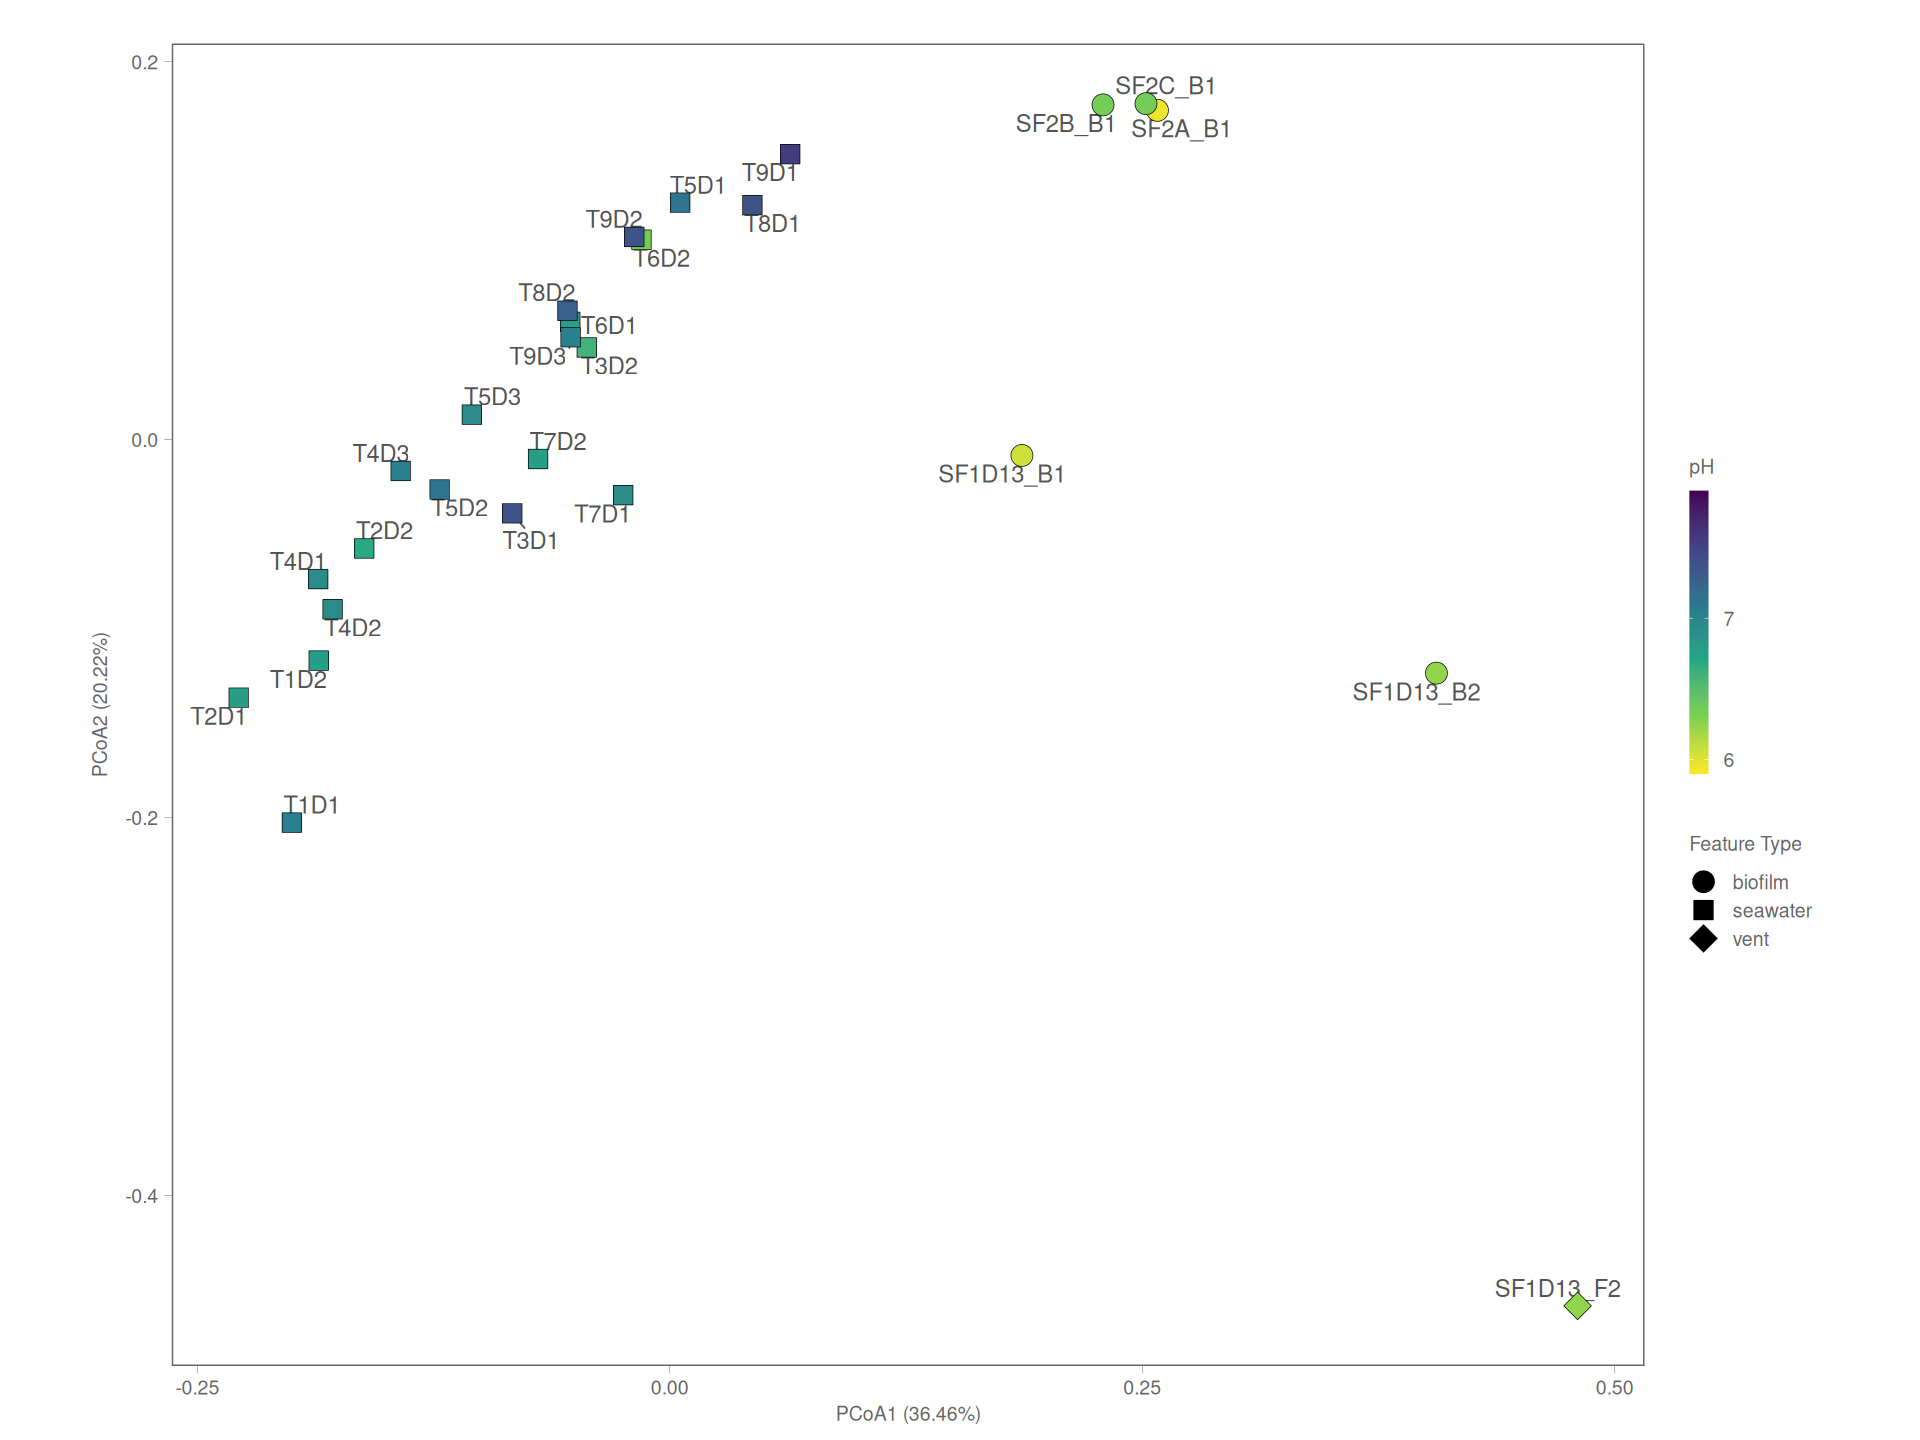

In [11]:
# plot weighted-Jaccard PCoA at genus level
genus_pcoa_prok_ra_jw <- plot_ordination(prok_ra_genus_cn5_kaiju, prok_pcoa_jw,title="PCoA weighted Jaccard similarity") +
  ggrepel::geom_text_repel(
    aes(label = samples), size = 5, color = "gray32",
    min.segment.length = 0, seed = 42, box.padding = 0.3
  ) +
  geom_point(
    aes(fill = ph_stretch, shape = feature_type),
    size = 6, color = "black", stroke = 0.3
  ) +
  scale_shape_manual(values = c(21, 22, 23)) +
  scale_fill_viridis_c(
  option = "viridis", direction = -1,
  limits = c(0, 1),
    breaks = stretch_ticks,
    labels = ph_ticks,
    oob = scales::squish
)+
  guides(
      fill  = guide_colorbar(barheight = unit(60, "mm")),
      shape = guide_legend(override.aes = list(fill = "black"))
  ) +
coord_fixed(ratio=1)+
labs(
  x = paste0("PCoA1 (", var_expl[1], "%)"),
  y = paste0("PCoA2 (", var_expl[2], "%)"),
  shape = "Feature Type",
  fill  = "pH",
  title = ""
)+
  theme_glab(base_size = 18) +
  theme(legend.position = "right") 

genus_pcoa_prok_ra_jw

#ggsave("./plots/pcoa_genus_jw_ph.png", width = 16, height = 12, dpi = 300)
#ggsave("/plots/pcoa_genus_jw_ph.svg", width = 16, height = 10, dpi = 300)

In [22]:
# transform sample pH values to a 0–1 stretched scale for visualization (piecewise rescaling)
stretch_ph(sample_data(prok_ra_genus_cn5_kaiju)$ph)

[1] 0.5666667 0.4366667 0.4366667 0.3933333 0.7400000 0.3500000 0.5233333
 [8] 0.5233333 0.5666667 0.6100000 0.6100000 0.5233333 0.4366667 0.2200000
[15] 0.5233333 0.4366667 0.7400000 0.6966667 0.8266667 0.7400000 0.5666667
[22] 0.0750000 0.1700000 0.1700000 0.0250000 0.2200000 0.2200000

In [16]:
# extract PCoA axis scores and combine with original and stretched pH values 
prok_pcoa_jw_plot <- data.frame(prok_pcoa_jw$vectors[,1], prok_pcoa_jw$vectors[,2], sample_data(prok_ra_genus_cn5_kaiju)$ph, stretch_ph(sample_data(prok_ra_genus_cn5_kaiju)$ph))

colnames(prok_pcoa_jw_plot) <- c("axis.1", "axis.2", "ph", "stretch.ph")

In [81]:
# remove row 14 from the PCoA plotting data frame
prok_pcoa_jw_plot <- prok_pcoa_jw_plot[c(1:13,15:21),]
prok_pcoa_jw_plot

,axis.1,axis.2,ph,stretch.ph
,<dbl>,<dbl>,<dbl>,<dbl>
T1D1,-0.199988951,-0.20265103,8.25,0.5666667
T1D2,-0.185792902,-0.11693362,8.22,0.4366667
T2D1,-0.228125555,-0.13656998,8.22,0.4366667
T2D2,-0.161731958,-0.05760509,8.21,0.3933333
T3D1,-0.083409922,-0.03898982,8.29,0.7400000
T3D2,-0.043943869,0.04876324,8.20,0.3500000
T4D1,-0.186095584,-0.07378104,8.24,0.5233333
T4D2,-0.178440339,-0.08976911,8.24,0.5233333
T4D3,-0.142406121,-0.01658713,8.25,0.5666667


In [82]:
# correlation test between PCoA1 and pH
cor.test(prok_pcoa_jw_plot$axis.1, prok_pcoa_jw_plot$ph, method = "pearson")


	Pearson's product-moment correlation

data:  prok_pcoa_jw_plot$axis.1 and prok_pcoa_jw_plot$ph
t = 2.7916, df = 18, p-value = 0.01205
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1415974 0.7980713
sample estimates:
      cor 
0.5496756 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


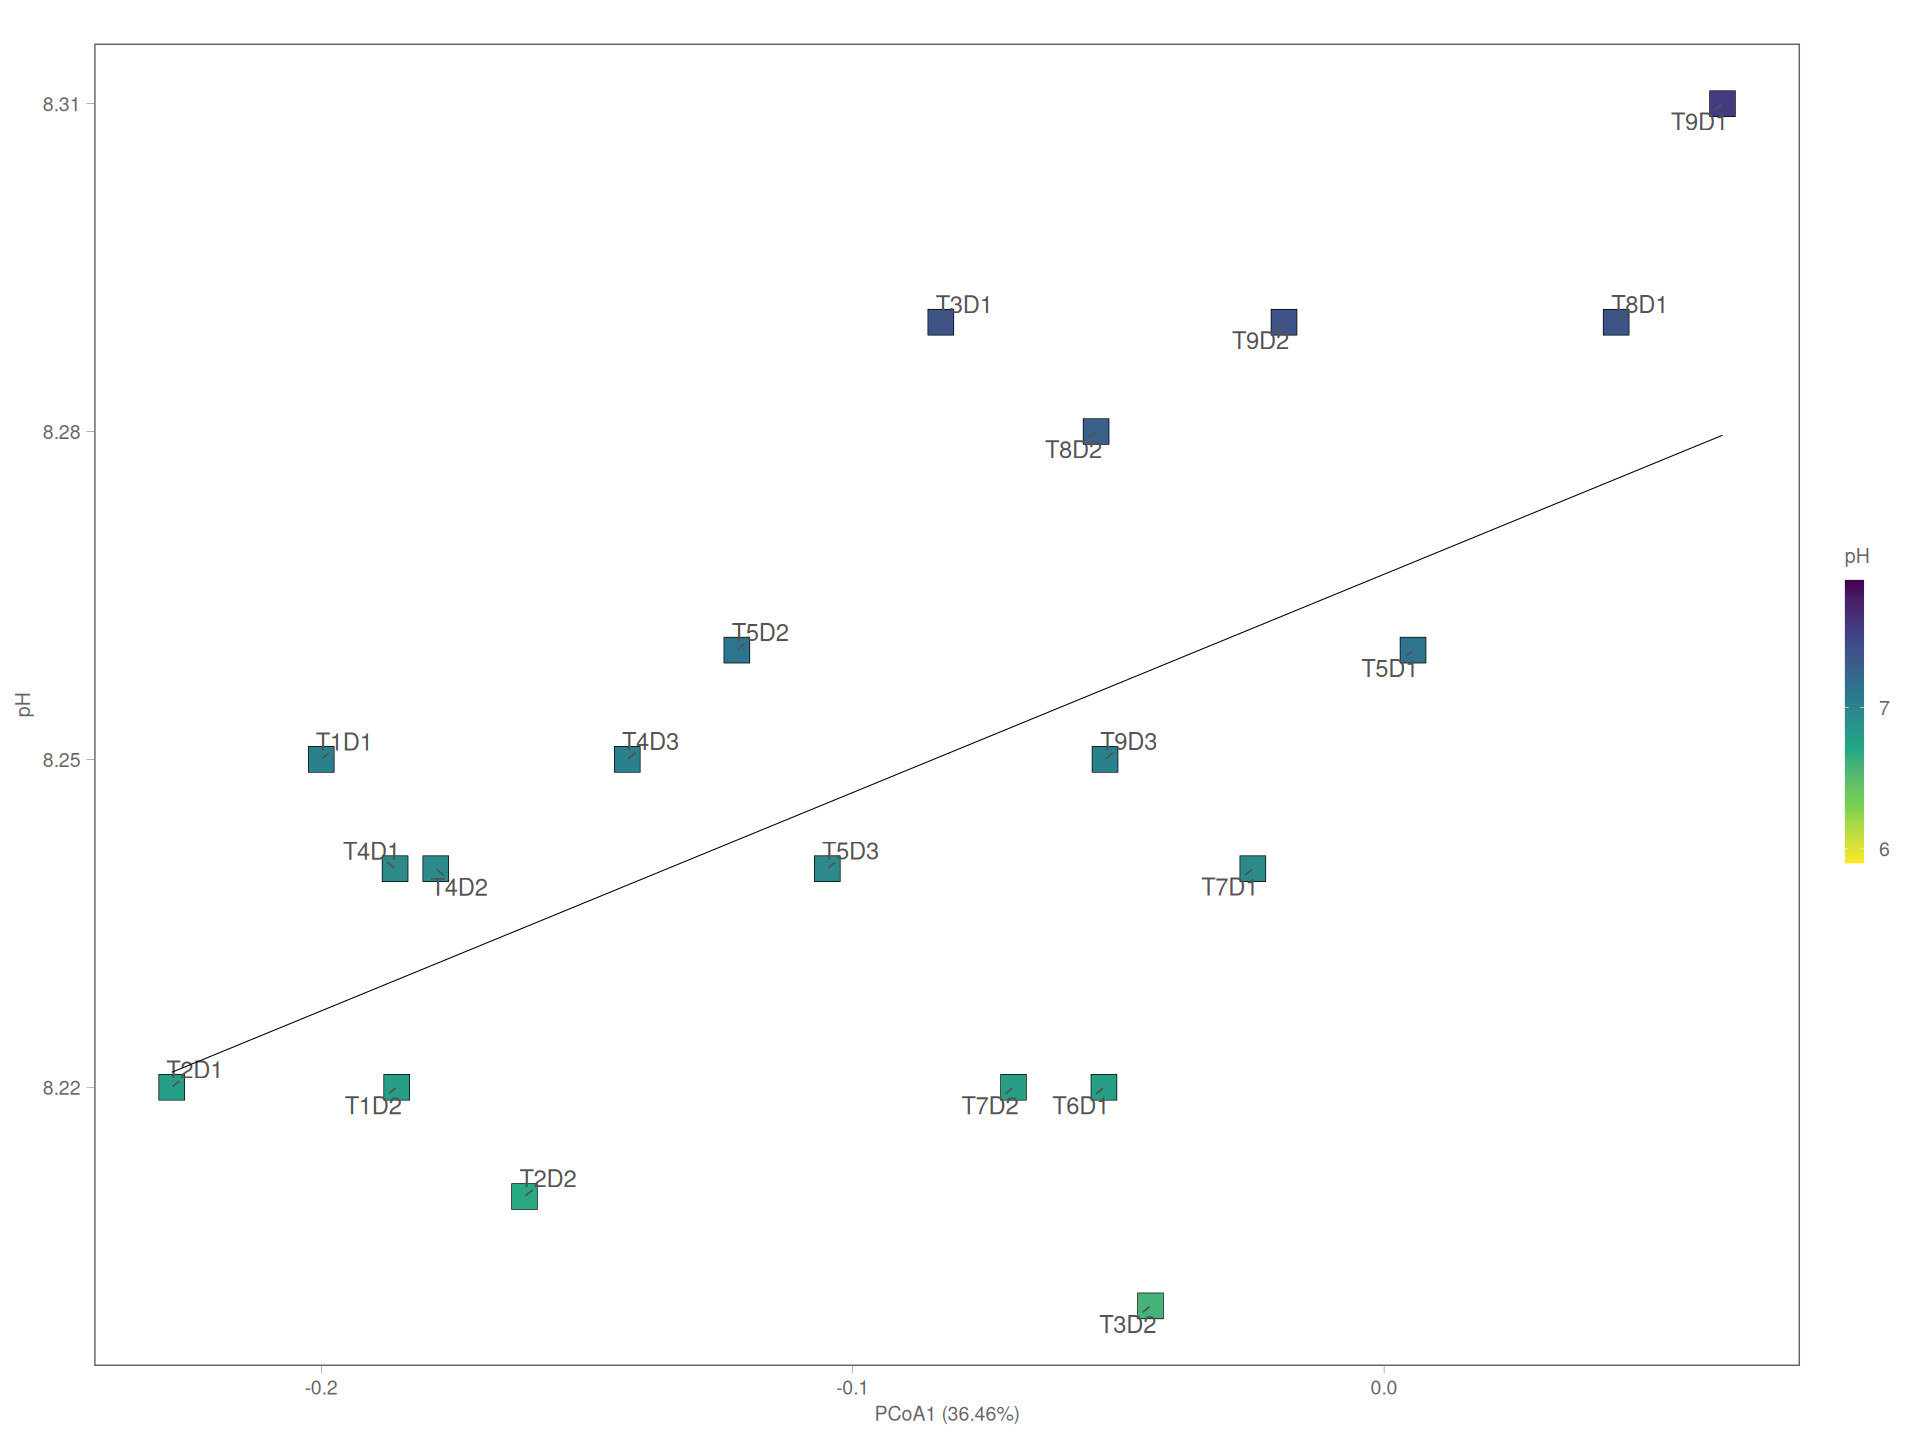

In [84]:
# correlation plot between PCoA1 and pH
ggplot(data=prok_pcoa_jw_plot, aes(x=axis.1, y=ph))+
 geom_point(
    aes(fill = stretch.ph),
    size = 8, color = "black", shape=22, stroke = 0.3
  ) +

  ggrepel::geom_text_repel(
    aes(label = rownames(prok_pcoa_jw_plot)), size = 5, color = "gray32",
    min.segment.length = 0, seed = 42, box.padding = 0.3
  ) +

geom_smooth(method = "lm", se = FALSE, color = "black", size=0.3) +

  scale_fill_viridis_c(
  option = "viridis", direction = -1,
  limits = c(0, 1),
    breaks = stretch_ticks,
    labels = ph_ticks,
    oob = scales::squish
)+

  guides(
      fill  = guide_colorbar(barheight = unit(60, "mm")),
      shape = guide_legend(override.aes = list(fill = "black"))
  ) +

labs(
  x = paste0("PCoA1 (", var_expl[1], "%)"),
  y = paste0("pH"),
  fill  = "pH",
  title = ""
)+

theme_glab(base_size = 18) +
  theme(legend.position = "right") 

#ggsave("./plots/pcoa_cor_jw_ph.svg", width = 16, height = 6, dpi = 300)
#ggsave(".plots/pcoa_cor_jw_ph.svg", width = 16, height = 6, dpi = 300)